##Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf

##Importing the dataset

In [2]:
import yfinance as yf
df = yf.download("RELIANCE.NS", start="2016-12-20", end="2021-10-03")
print(df.head())

/tmp/ipython-input-2-2749319623.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("RELIANCE.NS", start="2016-12-20", end="2021-10-03")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2016-12-20  232.736694  233.418686  231.691701  232.032704    11688169
2016-12-21  233.913681  234.804680  232.582697  233.220690    20367894
2016-12-22  231.735672  233.781661  231.207675  232.758666    28892834
2016-12-23  232.604675  235.167661  231.438671  231.438671    10265033
2016-12-26  230.437683  234.518661  229.821689  231.955675    15321770


In [3]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
print(df.head())

Price             Open        High         Low       Close      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2016-12-20  232.032704  233.418686  231.691701  232.736694    11688169
2016-12-21  233.220690  234.804680  232.582697  233.913681    20367894
2016-12-22  232.758666  233.781661  231.207675  231.735672    28892834
2016-12-23  231.438671  235.167661  231.438671  232.604675    10265033
2016-12-26  231.955675  234.518661  229.821689  230.437683    15321770


In [4]:
df.shape

(1183, 5)

## Plotting the close price curve

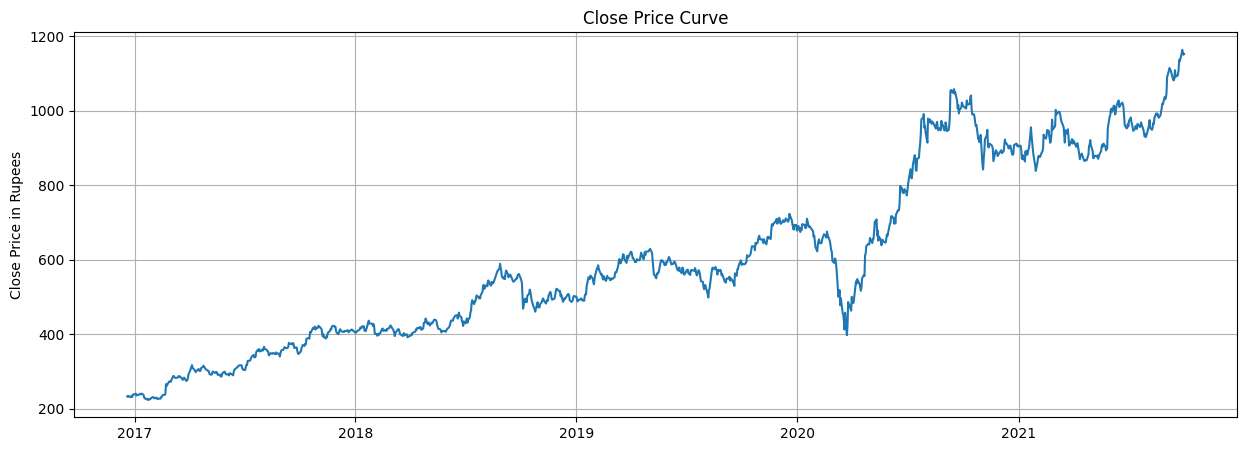

In [5]:
plt.figure(figsize=(15,5))
plt.plot(df["Close"])
plt.ylabel("Close Price in Rupees")
plt.title("Close Price Curve")
plt.grid()
plt.show()

##Distribution plot of Continuous variable

/tmp/ipython-input-6-69190622.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df[feat])
/tmp/ipython-input-6-69190622.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df[feat])
/tmp/ipython-input-6-69190622.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in se

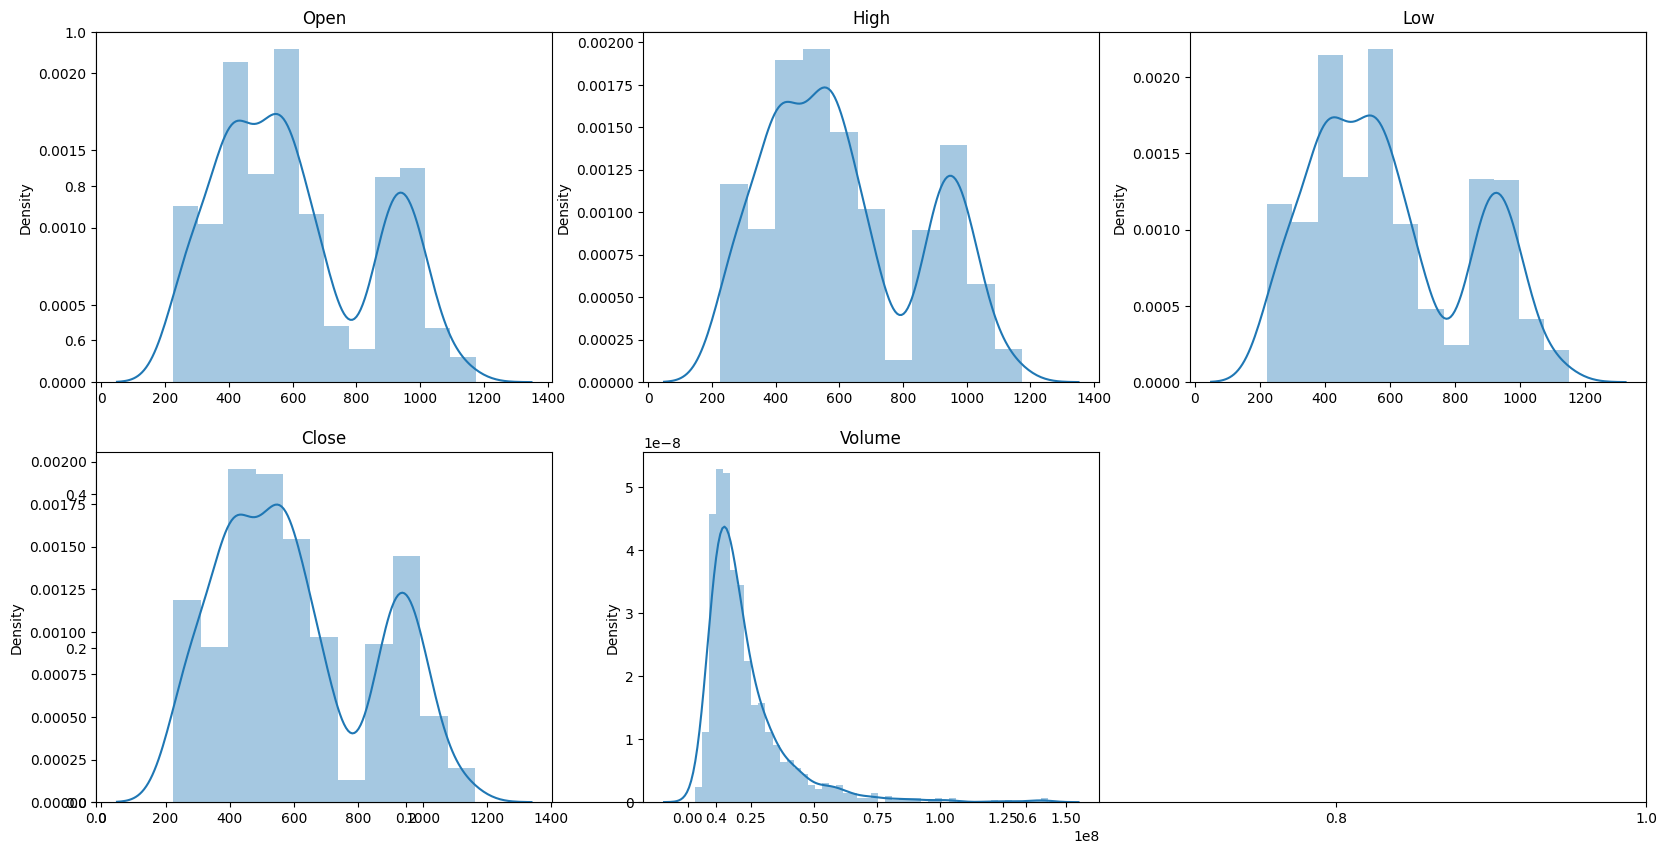

In [6]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, feat in enumerate(features):
  plt.subplot(2,3,i+1)
  sbn.distplot(df[feat])
  plt.title(feat)
plt.show()

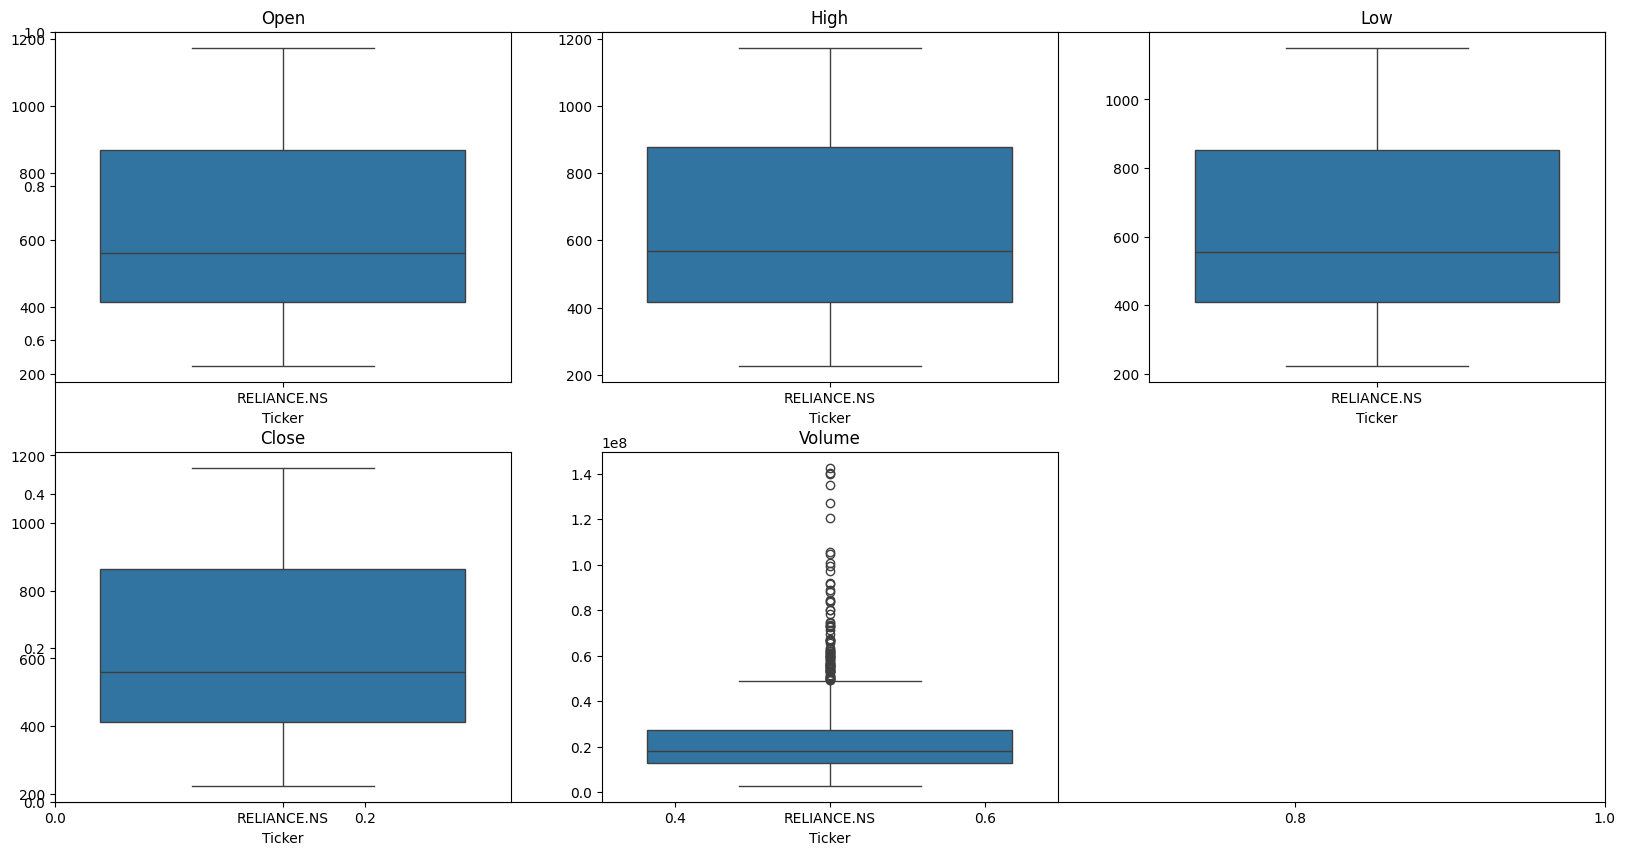

In [7]:
plt.subplots(figsize=(20,10))
for i, feat in enumerate(features):
  plt.subplot(2,3,i+1)
  sbn.boxplot(df[feat])
  plt.title(feat)
plt.show()

##Feature Engineering

In [8]:
def add_technical_indicators(df):
    df['MA5'] = df['Close'].shift(1).rolling(window=5).mean()
    df['MA10'] = df['Close'].shift(1).rolling(window=10).mean()
    df = df.dropna()
    return df

In [9]:
df = add_technical_indicators(df)

df.head()

Price,Open,High,Low,Close,Volume,MA5,MA10
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,
Date,,,,,,,
2017-01-03,239.765668,241.338658,237.840675,239.666656,6434204,235.282065,233.783873
2017-01-04,240.436635,240.458635,234.144674,234.771667,10392483,236.368857,234.476869
2017-01-05,235.618661,237.576638,235.123663,237.026642,8734164,237.136655,234.562668
2017-01-06,236.322661,238.698653,236.080655,236.487656,7845839,237.662451,235.091765
2017-01-09,236.938657,238.918648,235.618672,237.092651,5228980,237.334656,235.480063


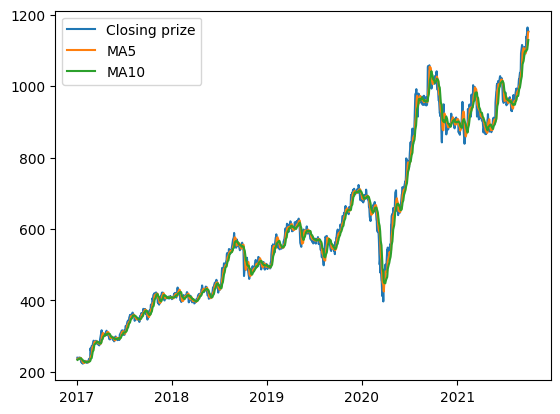

In [10]:
plt.plot(df['Close'], label='Closing prize')
plt.plot(df['MA5'], label='MA5')
plt.plot(df['MA10'], label='MA10')
# plt.plot(df['MA200'], label='MA200')
plt.legend()
plt.show()

##Adding News Sentiment in the dataframe

In [11]:
df1=pd.read_csv('Reliance_News_Sentiment.csv', parse_dates=['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])
df1.head()

,Date,News,Sentimentlabel
0,2017-01-03,Get ready for some fund manager churning. Meen...,-1.0
1,2017-01-04,The Financial ExpressReliance Jio has announce...,1.0
2,2017-01-06,MUMBAI: Reliance Retail is launching stores wh...,0.0
3,2017-01-07,The Financial ExpressAhead of the government a...,-1.0
4,2017-01-08,The Financial ExpressIndian markets are likely...,1.0


In [12]:
df = df.reset_index()

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df = df[df['Date'] != 'Ticker']
df = df.copy()

In [15]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume','MA5', 'MA10']

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume,MA5,MA10
0,2017-01-03,239.765668,241.338658,237.840675,239.666656,6434204,235.282065,233.783873
1,2017-01-04,240.436635,240.458635,234.144674,234.771667,10392483,236.368857,234.476869
2,2017-01-05,235.618661,237.576638,235.123663,237.026642,8734164,237.136655,234.562668
3,2017-01-06,236.322661,238.698653,236.080655,236.487656,7845839,237.662451,235.091765
4,2017-01-09,236.938657,238.918648,235.618672,237.092651,5228980,237.334656,235.480063


In [17]:
merged_df = pd.merge(df, df1,on='Date', how='left')

In [18]:
merged_df.head()

,Date,Open,High,Low,Close,Volume,MA5,MA10,News,Sentimentlabel
0,2017-01-03,239.765668,241.338658,237.840675,239.666656,6434204,235.282065,233.783873,Get ready for some fund manager churning. Meen...,-1.0
1,2017-01-04,240.436635,240.458635,234.144674,234.771667,10392483,236.368857,234.476869,The Financial ExpressReliance Jio has announce...,1.0
2,2017-01-05,235.618661,237.576638,235.123663,237.026642,8734164,237.136655,234.562668,NaN,NaN
3,2017-01-06,236.322661,238.698653,236.080655,236.487656,7845839,237.662451,235.091765,MUMBAI: Reliance Retail is launching stores wh...,0.0
4,2017-01-09,236.938657,238.918648,235.618672,237.092651,5228980,237.334656,235.480063,NaN,NaN


In [19]:
merged_df['Sentimentlabel'] = merged_df['Sentimentlabel'].shift(1)

In [20]:
merged_df['Sentimentlabel'] = merged_df['Sentimentlabel'].fillna(0)

In [21]:
merged_df.head()

,Date,Open,High,Low,Close,Volume,MA5,MA10,News,Sentimentlabel
0,2017-01-03,239.765668,241.338658,237.840675,239.666656,6434204,235.282065,233.783873,Get ready for some fund manager churning. Meen...,0.0
1,2017-01-04,240.436635,240.458635,234.144674,234.771667,10392483,236.368857,234.476869,The Financial ExpressReliance Jio has announce...,-1.0
2,2017-01-05,235.618661,237.576638,235.123663,237.026642,8734164,237.136655,234.562668,NaN,1.0
3,2017-01-06,236.322661,238.698653,236.080655,236.487656,7845839,237.662451,235.091765,MUMBAI: Reliance Retail is launching stores wh...,0.0
4,2017-01-09,236.938657,238.918648,235.618672,237.092651,5228980,237.334656,235.480063,NaN,0.0


## Data Processing

In [22]:
x = merged_df[['Open', 'Volume','MA5', 'MA10', 'Sentimentlabel']].values
y= merged_df['Close'].values

### Splitting the dataset into training set & test set

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1, shuffle=False)

###Feature scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
# from sklearn.preprocessing import MinMaxScaler
# # Step 1: Select relevant columns
# features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentimentlabel']
# df_model = merged_df[features].copy()

# # Step 2: Fill missing values (just in case)
# df_model = df_model.fillna(0)

# # Step 3: Normalize features
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df_model)

# # Step 4: Create time series data
# def create_sequences(data, window_size):
#     X, y = [], []
#     for i in range(window_size, len(data)-1):
#         X.append(data[i-window_size:i])
#         y.append(data[i+1][3])  # index 3 = 'Close'
#     return np.array(X), np.array(y)

# window_size = 30  # use past 30 days
# X, y = create_sequences(scaled_data, window_size)

# # Step 5: Train-test split
# split_index = int(0.8 * len(X))
# x_train, x_test = X[:split_index], X[split_index:]
# y_train, y_test = y[:split_index], y[split_index:]


## Training the Random Forest Regression Model on the training set

In [26]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=100, random_state=0)
# model.fit(x_train, y_train)

##Adding Neural Network for the trainig

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=x_train.shape[1]))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['r2_score'])

In [30]:
model.fit(x_train, y_train, epochs=400, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 360034.3438 - r2_score: -6.8273 - val_loss: 957300.0000 - val_r2_score: -159.3545
Epoch 2/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 364335.3125 - r2_score: -7.0725 - val_loss: 820924.0000 - val_r2_score: -136.5105
Epoch 3/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 257870.5469 - r2_score: -4.8820 - val_loss: 167277.2812 - val_r2_score: -27.0201
Epoch 4/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20657.0645 - r2_score: 0.5462 - val_loss: 11394.0664 - val_r2_score: -0.9086
Epoch 5/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6147.0220 - r2_score: 0.8562 - val_loss: 6855.4204 - val_r2_score: -0.1483
Epoch 6/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4574.8301 - r2_score: 0.8985 - val_loss: 6770.9482 - val_r2_score: -0.1342
Epoch 7/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3291.8828 - r2_score: 0.9237 - val_loss: 5912.7134 - val_r2_score: 0.0096
Epoch 8/400
33/33 ━━━━━━━━━━━━━━━━━━━━ 0

## Adding LSTM for training

In [31]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

In [32]:
x_train.shape[0]

1055

In [33]:
# model = Sequential([
#     LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
#     Dropout(0.2),
#     LSTM(32),
#     Dropout(0.2),
#     Dense(1)
# ])

In [34]:
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['r2_score'])

In [35]:
# model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

##Evaluating the model

In [36]:
y_predict = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [37]:
mse = mean_squared_error(y_test, y_predict)
mbe = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mbe)
print('R2 Square: ', r2)

Mean Squared Error:  281.5236361470957
Mean Absolute Error:  13.557104595636916
R2 Square:  0.9528438786731321


##Plotting the Prediction

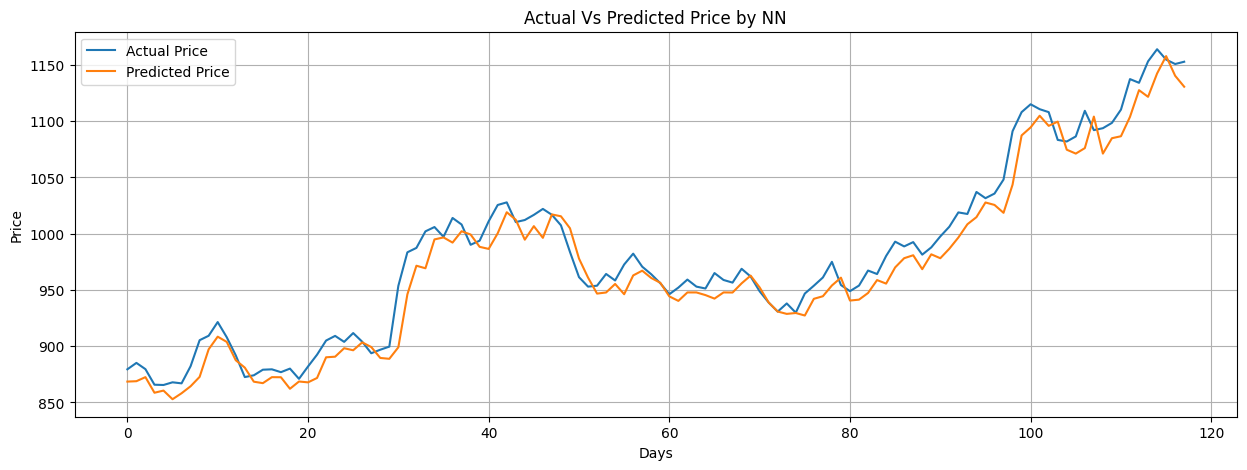

In [38]:
plt.figure(figsize=(15,5))
plt.plot(y_test, label='Actual Price')
plt.plot(y_predict, label='Predicted Price')
plt.legend()
plt.title("Actual Vs Predicted Price by NN")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid()
plt.show()

##Predict closing price of the stock within a month

In [ ]:
input_date_str=input(print('Date in YYYY-MM-DD:'))

Date in YYYY-MM-DD:


In [ ]:
from datetime import datetime, timedelta
try:
    input_date = datetime.strptime(input_date_str, "%Y-%m-%d")
    print("You entered:", input_date)
    data = yf.download("RELIANCE.NS", start=input_date_str, end=(input_date + timedelta(days=1)).strftime("%Y-%m-%d"))
except ValueError:
    print("Invalid date format! Please use YYYY-MM-DD.")


In [ ]:
if data.empty:
  print("No stock data available for the given date.")
else:
  open_price = data['Open'].values[0]
  volume = data['Volume'].values[0]
  close_price = data['Close'].values[0]
  print(f"\n📈 Market Data on {input_date_str}:")
  print(f"Open: {open_price}, Volume: {volume}, Close: {close_price}")

In [ ]:
start_date=input_date-timedelta(14)
df5=yf.download("RELIANCE.NS",  start=start_date, end=input_date)
df5.head()

In [ ]:
a=df5['Close'].values

In [ ]:
Ma5=sum(a[-10:5])/5
Ma10=sum(a)/10
print(Ma10)
print(Ma5)

In [ ]:
import requests

url = ('https://newsapi.org/v2/everything?'
       'q=Reliance&'
       'from=input_date_str&'
       'to=(input_date + timedelta(days=1)).strftime("%Y-%m-%d")&'
       'sortBy=StockMarket&'
       'apiKey=c69dfcb734db4a70936f6a4b387c9820')

response = requests.get(url)
data1 = response.json()
headline = [article['title'] for article in data1 ['articles']]


In [ ]:
print(headline)

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_sentiment_scores(headline):
    analyzer = SentimentIntensityAnalyzer()
    scores = [analyzer.polarity_scores(headline)['compound'] for headline in headline]
    return sum(scores) / len(scores) if scores else 0

In [ ]:
sentiment = get_sentiment_scores(headline)
print(sentiment)

In [ ]:
new_df=[open_price, volume,Ma5, Ma10, sentiment]
new_df = [x.item() if isinstance(x, np.ndarray) else x for x in new_df]
print(new_df)

In [ ]:
print(model.predict(sc.transform([new_df])))
print('Actual Close price:', close_price)